> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: IMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project I will analyze the data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

> What are the most popular movies over time?

> Do all the popular movies have a huge budget?

> Are there any popular movies with small budget are popular?

> Does the runtime plays a role in the movie rate?

> The most famous directors

> My general thoughts about the data "Using visualization".

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv' , sep=',')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> I am going to start the clean process by dropping the columns we do not need
  Here I will drop homepage, id, cast, tagline, keywords                

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['homepage' , 'id' , 'cast' , 'tagline' , 'keywords','imdb_id' , 'production_companies'] , axis = 1 , inplace = True)

In [9]:
df.head()

,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# check if there are any columns with missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [11]:
# dropping the rows with null values in director
df = df.dropna(subset=['director'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10822 non-null float64
budget            10822 non-null int64
revenue           10822 non-null int64
original_title    10822 non-null object
director          10822 non-null object
overview          10819 non-null object
runtime           10822 non-null int64
genres            10801 non-null object
release_date      10822 non-null object
vote_count        10822 non-null int64
vote_average      10822 non-null float64
release_year      10822 non-null int64
budget_adj        10822 non-null float64
revenue_adj       10822 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [13]:
#dropping all the null values
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10799 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10799 non-null float64
budget            10799 non-null int64
revenue           10799 non-null int64
original_title    10799 non-null object
director          10799 non-null object
overview          10799 non-null object
runtime           10799 non-null int64
genres            10799 non-null object
release_date      10799 non-null object
vote_count        10799 non-null int64
vote_average      10799 non-null float64
release_year      10799 non-null int64
budget_adj        10799 non-null float64
revenue_adj       10799 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [15]:
df['runtime'] = df['runtime'].map( lambda x : df.runtime.mean() if x == 0 else x)


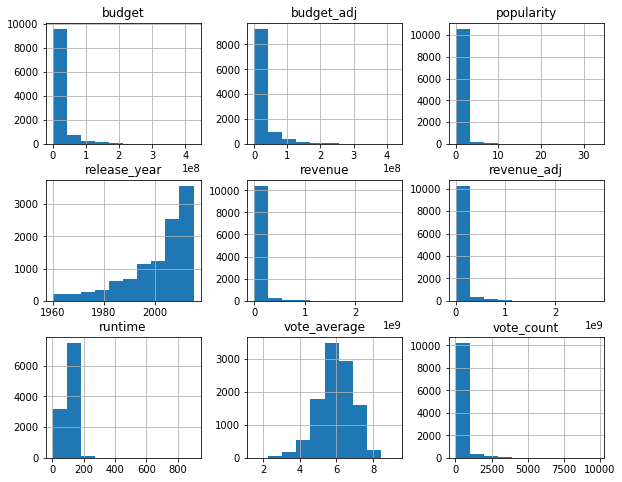

In [16]:
#overview visualizon on the remainning data
df.hist(figsize=(10,8));


In [57]:
def find_percentage(df,total):
    print('{} %'.format((df.count()[0]/total.count()[0])*100))

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


## Research Question 1 (What are the most popular movies over time?)
> To check the popular movies we need to check both of vote average and vote count

In [58]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
popular_movies = df.sort_values(['vote_count' , 'vote_average'] , ascending=[False, False])

In [59]:
popular_movies.head(10)

,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,9.36,160000000,825500000,Inception,Christopher Nolan,"Cobb, a skilled thief who commits corporate es...",148.00,Action|Thriller|Science Fiction|Mystery|Adventure,7/14/10,9767,7.90,2010,160000000.00,825500000.00
4361,7.64,220000000,1519557910,The Avengers,Joss Whedon,When an unexpected enemy emerges and threatens...,143.00,Science Fiction|Action|Adventure,4/25/12,8903,7.30,2012,208943741.90,1443191435.21
1386,9.43,237000000,2781505847,Avatar,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162.00,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.10,2009,240886902.89,2827123750.41
2875,8.47,185000000,1001921825,The Dark Knight,Christopher Nolan,Batman raises the stakes in his war on crime. ...,152.00,Drama|Action|Crime|Thriller,7/16/08,8432,8.10,2008,187365527.25,1014733032.48
4364,5.94,100000000,425368238,Django Unchained,Quentin Tarantino,"With the help of a German bounty hunter, a fre...",165.00,Drama|Western,12/25/12,7375,7.70,2012,94974428.14,403991051.51
4382,2.57,75000000,691210692,The Hunger Games,Gary Ross,Every year in the ruins of what was once North...,142.00,Science Fiction|Adventure|Fantasy,3/12/12,7080,6.70,2012,71230821.10,656473401.94
5425,4.95,200000000,1215439994,Iron Man 3,Shane Black,When Tony Stark's world is torn apart by a for...,130.00,Action|Adventure|Science Fiction,4/18/13,6882,6.90,2013,187206670.55,1137692372.64
4363,6.59,250000000,1081041287,The Dark Knight Rises,Christopher Nolan,Following the death of District Attorney Harve...,165.00,Action|Crime|Drama|Thriller,7/16/12,6723,7.50,2012,237436070.34,1026712780.23
629,24.95,165000000,621752480,Interstellar,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169.00,Adventure|Drama|Science Fiction,11/5/14,6498,8.00,2014,151980023.38,572690645.12
4367,4.22,250000000,1017003568,The Hobbit: An Unexpected Journey,Peter Jackson,"Bilbo Baggins, a hobbit enjoying his quiet lif...",169.00,Adventure|Fantasy|Action,11/26/12,6417,6.90,2012,237436070.34,965893322.82


> The top rated 5 movies
    - Inception
    - The Avengers
    - Avatar
    - The Dark Knight
    - Django Unchained

### Research Question 2  Do all the popular movies have a huge budget?

In [60]:
# this is used to display the full number without e+
pd.options.display.float_format = '{:.2f}'.format

In [61]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00,10799.00
mean,0.65,14715277.63,40069376.13,102.45,218.63,5.97,2001.29,17658784.66,51682010.41
std,1.00,30987903.77,117324031.17,30.34,577.19,0.93,12.82,34384989.40,145024051.88
min,0.00,0.00,0.00,2.00,10.00,1.50,1960.00,0.00,0.00
25%,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,0.39,0.00,0.00,99.00,39.00,6.00,2006.00,0.00,0.00
75%,0.72,15887474.00,24569672.50,111.50,147.00,6.60,2011.00,21033371.65,34090085.22
max,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [62]:
df['budget'].describe()

count       10799.00
mean     14715277.63
std      30987903.77
min             0.00
25%             0.00
50%             0.00
75%      15887474.00
max     425000000.00
Name: budget, dtype: float64

#### The popularity mean is 0.649527 and the budget mean is 14715277
> so let's work with that and see how many movies with above average rate with low budget

In [63]:
under_budget_popular_movies = df.query('popularity > 0.649527 & budget < 14715277')

In [64]:
under_budget_popular_movies.head(10)

,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.93,0,29355203,Mr. Holmes,Bill Condon,"The story is set in 1947, following a long-ret...",103.00,Mystery|Drama,6/19/15,425,6.40,2015,0.00,27006774.88
35,3.56,6000000,35401758,Room,Lenny Abrahamson,Jack is a young boy of 5 years old who has liv...,117.00,Drama|Thriller,10/16/15,1520,8.00,2015,5519997.57,32569603.03
36,3.36,0,22354572,Solace,Afonso Poyart,"A psychic doctor, John Clancy, works with an F...",101.00,Crime|Drama|Mystery,9/3/15,474,6.20,2015,0.00,20566197.19
39,3.23,11000000,62076141,Brooklyn,John Crowley,"In 1950s Ireland and New York, young Ellis Lac...",111.00,Drama|Romance,11/4/15,754,7.30,2015,10119995.55,57110024.59
45,3.02,10000000,14333790,Hardcore Henry,Ilya Naishuller,"Henry, a newly resurrected cyborg who must sav...",97.00,Action|Adventure|Science Fiction,9/12/15,396,5.90,2015,9199995.95,13187081.00
47,2.97,12000000,85512300,Paper Towns,Jake Schreier,Quentin Jacobsen has spent a lifetime loving t...,109.00,Drama|Mystery|Romance,7/9/15,1252,6.20,2015,11039995.14,78671281.38
49,2.89,4000000,9064511,The Lobster,Yorgos Lanthimos,"In a dystopian near future, single people, acc...",118.00,Thriller|Comedy|Drama|Romance|Science Fiction,10/8/15,638,6.60,2015,3679998.38,8339346.45
50,2.88,11800000,40272135,Carol,Todd Haynes,"In 1950s New York, a department-store clerk wh...",118.00,Romance|Drama,11/20/15,562,7.10,2015,10855995.22,37050347.90
62,2.46,3500000,40423945,The Witch,Robert Eggers,New England in the 1630s: William and Katherin...,92.00,Mystery|Horror,3/24/15,700,5.80,2015,3219998.58,37190013.04
70,2.30,13000000,32848185,Eye in the Sky,Gavin Hood,A military officer in command of a drone opera...,102.00,Drama|Thriller|War,9/11/15,265,7.20,2015,11959994.74,30220316.90


In [65]:
under_budget_popular_movies.count()

popularity        1161
budget            1161
revenue           1161
original_title    1161
director          1161
overview          1161
runtime           1161
genres            1161
release_date      1161
vote_count        1161
vote_average      1161
release_year      1161
budget_adj        1161
revenue_adj       1161
dtype: int64

In [66]:
# under_budget_popular_movies percentage
find_percentage(under_budget_popular_movies,df)

10.750995462542829 %


In [67]:
df.query('budget == 0').count()

popularity        5634
budget            5634
revenue           5634
original_title    5634
director          5634
overview          5634
runtime           5634
genres            5634
release_date      5634
vote_count        5634
vote_average      5634
release_year      5634
budget_adj        5634
revenue_adj       5634
dtype: int64

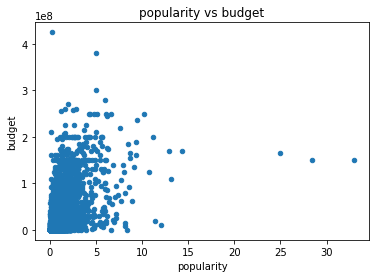

In [78]:
df.plot(x="popularity" , y="budget", kind="scatter",title="popularity vs budget") ;


In [69]:
find_percentage(under_budget_popular_movies.query('budget == 0'),df)

5.176405222705806 %


### We notice that there are about 10 % of the popular movies have a budget lower than the average budget and half of them are with 0 us dollar budget like the independent movies

## Research Question 3 (Does the runtime plays a role in the movie rate?)


In [70]:
short_movies = df.query('runtime < 30 & popularity > .65')

In [71]:
short_movies.count()

popularity        25
budget            25
revenue           25
original_title    25
director          25
overview          25
runtime           25
genres            25
release_date      25
vote_count        25
vote_average      25
release_year      25
budget_adj        25
revenue_adj       25
dtype: int64

In [72]:
find_percentage(short_movies,df.query('runtime < 30'))

13.089005235602095 %


Text(0.5,1,'Movies run time')

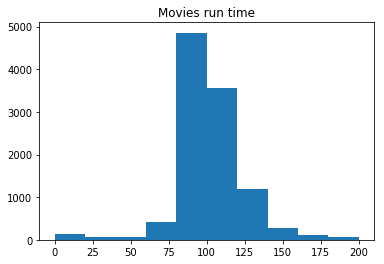

In [84]:

plt.hist(x=df['runtime'] ,range=(0,200)) ; 
plt.title("Movies run time")

### Oh well that kinda expected , the number of short movies compared to +90 mins movies is low thus their percentage is kinda low and only 13% of the short movies are populart but still there are some popular short movies

## Research Question 4 ( The most famous directors)

In [74]:
popular_movies.groupby(['director'])['popularity'].count().sort_values(ascending=False).head(10)

director
Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: popularity, dtype: int64

> Well our top director is woody allen with 45 popular movies and here is the rest of the top 10 directors : 

- Clint Eastwood       34
- Steven Spielberg     29
- Martin Scorsese      29
- Ridley Scott         23
- Ron Howard           22
- Steven Soderbergh    22
- Joel Schumacher      21
- Brian De Palma       20
- Wes Craven           19

###  My general thoughts about the data "Using visualization"

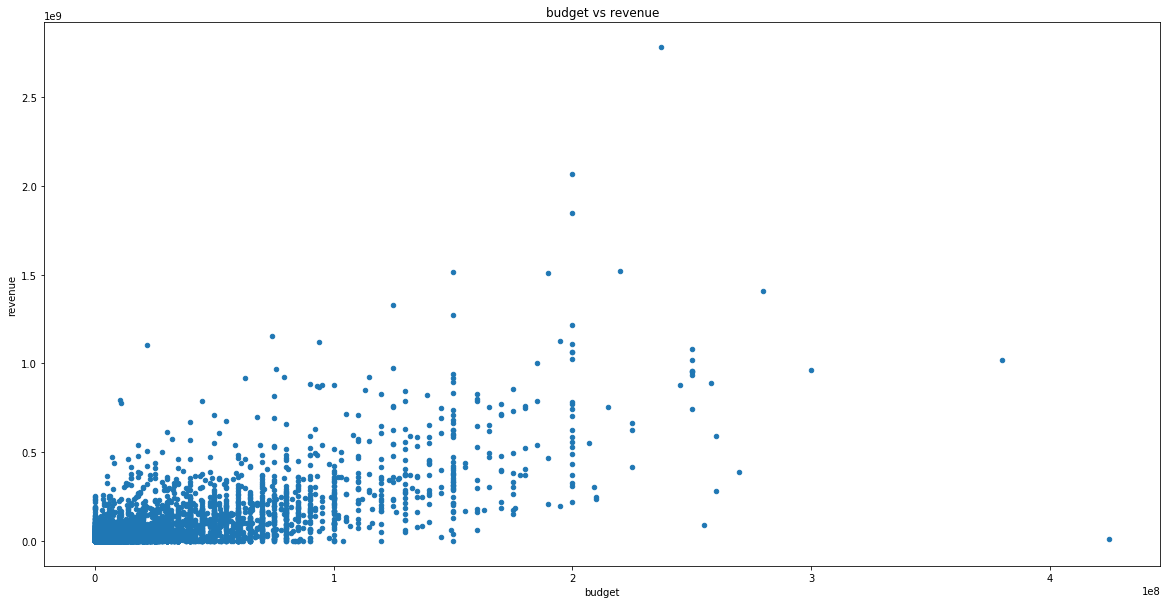

In [86]:
df.plot(x='budget' , y='revenue', kind = "scatter" ,figsize=(20,10) , title="budget vs revenue");

> hmmmmmmm we can see that a good percentage of movies with high budget could acheve acceptable revenue , but this is not always  the case , there are some movie with big budget failed , and some movie with low budget could score high revenue

<a id='conclusions'></a>
## Conclusions

> So at the end we reach to a conclusion that our top 5 movies are : 
- Inception
- The Avengers
- Avatar
- The Dark Knight
- Django Unchained

> When it comes to budget it is a little tricky, Most of movies with huge budget had a great revenue but about 10% of the popular movies have a low budget and half of them with 0 budget

> Short movies are not that popular as only 13% of them are actually popular

> Woody allen and Clint Eastwood were one of the popular directors ever

### Limitations
>In the first 2  questions , It is the 100% accurate way to find the popular movies, as there are more popular movies but with lower rate and there are a less popular movies with higher rate and more people voted

> I wish a could create a relation between genre and popularity but it is too complicated as the one movie has 4 or 5 geners

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])